# Individual models vs General models
#### A brief look
Here, a series of graphs are generated comparing the MAE values from the individual models to the average of the general models.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pycaret.datasets import get_data

In [11]:
df_temp = pd.read_csv('data/initial_features.csv')

df_temp.columns

Index(['subject', 'experimental_condition', 'rpe', 'wrist_acc_time',
       'wrist_acc_length', 'wrist_acc_mean', 'wrist_acc_rms', 'wrist_acc_mad',
       'wrist_acc_std', 'wrist_acc_min', 'wrist_acc_max', 'wrist_acc_med',
       'wrist_acc_perc25', 'wrist_acc_perc75', 'wrist_jerk_mean',
       'wrist_jerk_rms', 'wrist_jerk_mad', 'wrist_jerk_std', 'wrist_jerk_min',
       'wrist_jerk_max', 'wrist_jerk_med', 'wrist_jerk_perc25',
       'wrist_jerk_perc75', 'trunk_acc_mean', 'trunk_acc_rms', 'trunk_acc_mad',
       'trunk_acc_std', 'trunk_acc_min', 'trunk_acc_max', 'trunk_acc_med',
       'trunk_acc_perc25', 'trunk_acc_perc75', 'trunk_jerk_mean',
       'trunk_jerk_rms', 'trunk_jerk_mad', 'trunk_jerk_std', 'trunk_jerk_min',
       'trunk_jerk_max', 'trunk_jerk_med', 'trunk_jerk_perc25',
       'trunk_jerk_perc75', 'upperarm_acc_mean', 'upperarm_acc_rms',
       'upperarm_acc_mad', 'upperarm_acc_std', 'upperarm_acc_min',
       'upperarm_acc_max', 'upperarm_acc_med', 'upperarm_acc_perc25'

In [3]:
%%capture
df_general_raw = get_data('outputs/general/test_general')
df_individual_raw = get_data('outputs/individual/test_individual')

df_general = df_general_raw.groupby('Model').mean().reset_index()
df_individual = df_individual_raw.groupby(['Subject', 'Model']).mean().reset_index()
df_list = [df_general, df_individual]

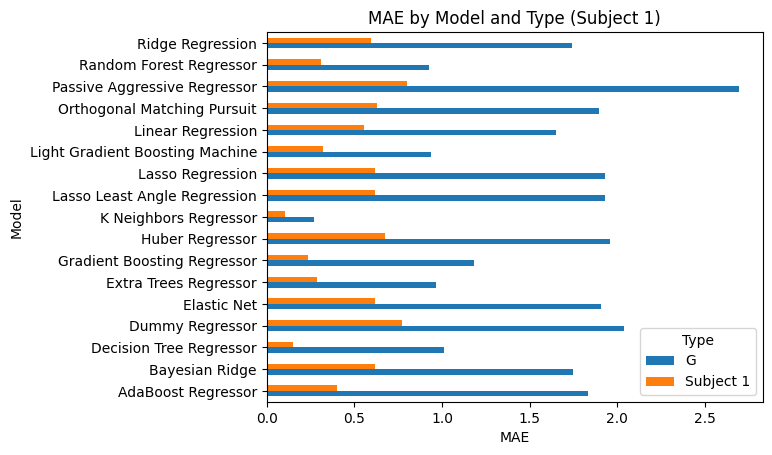

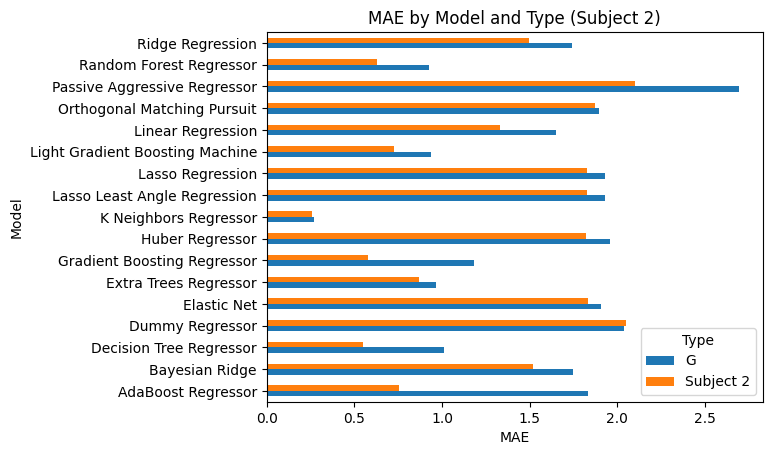

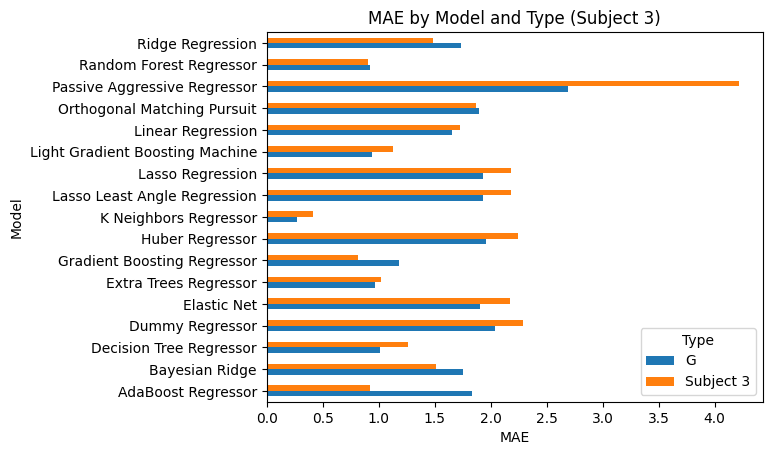

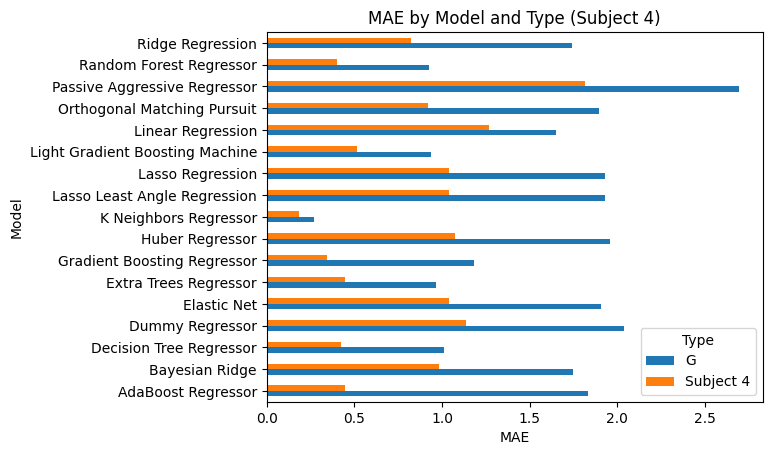

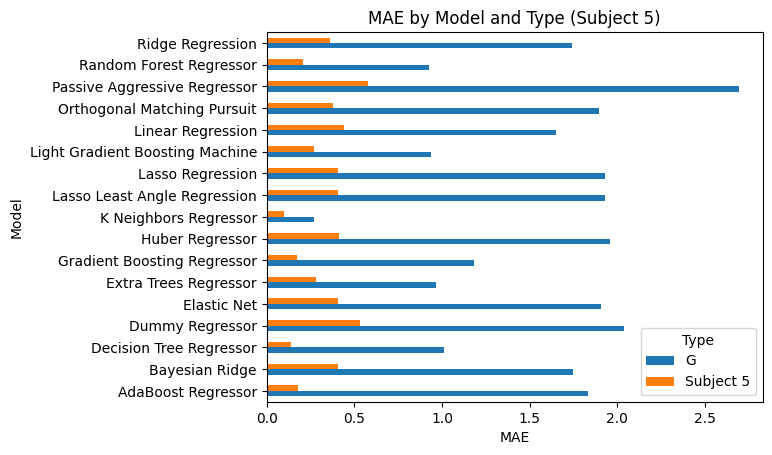

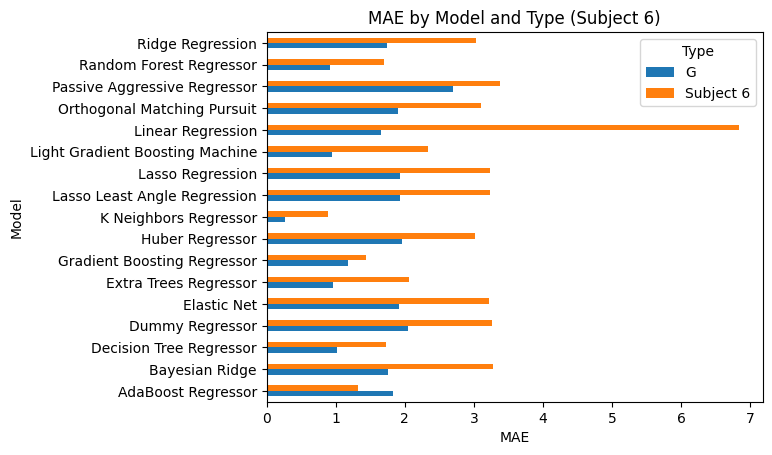

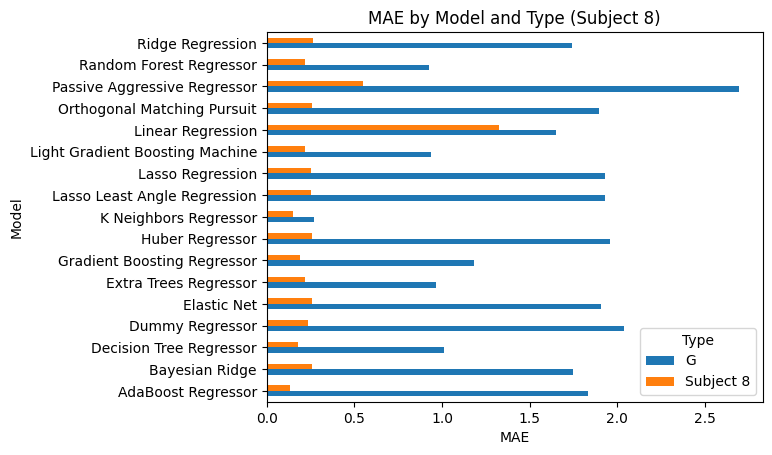

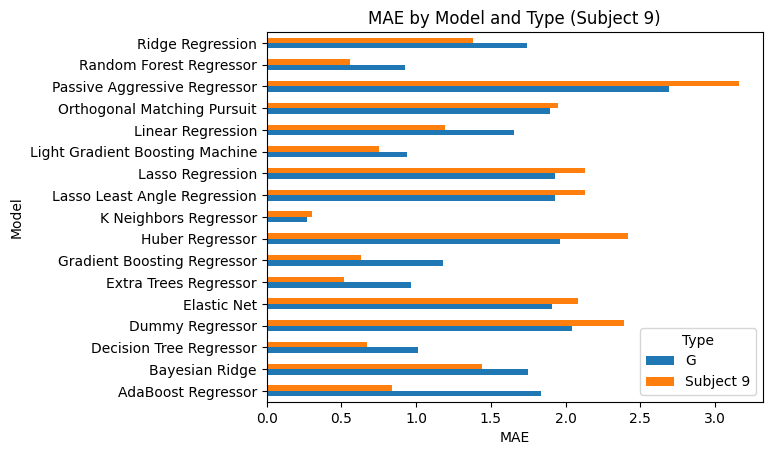

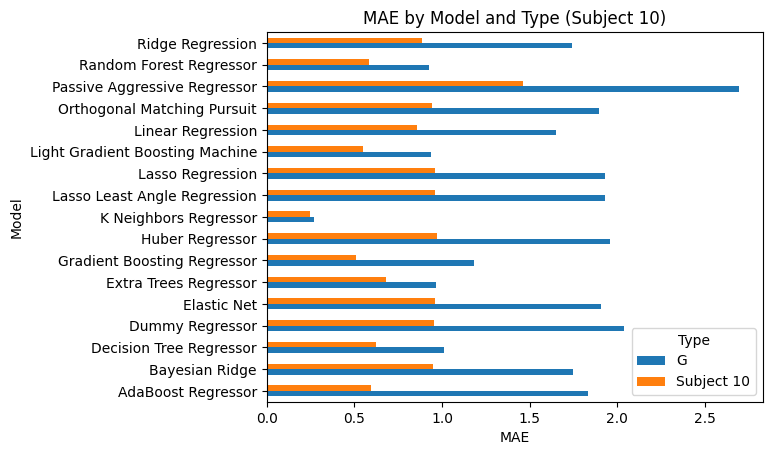

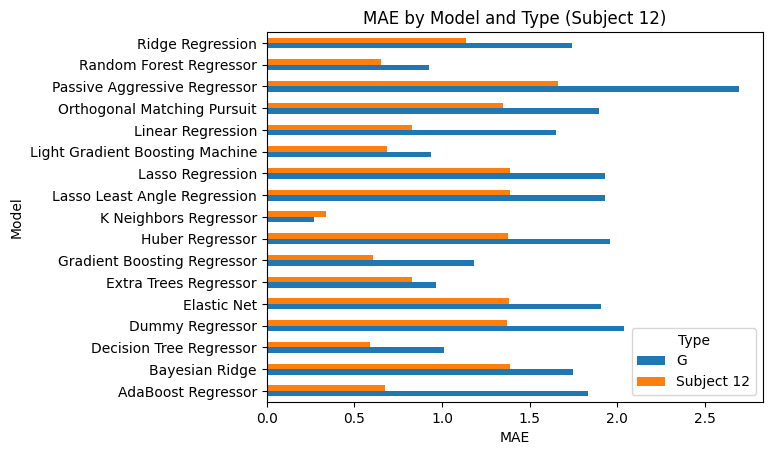

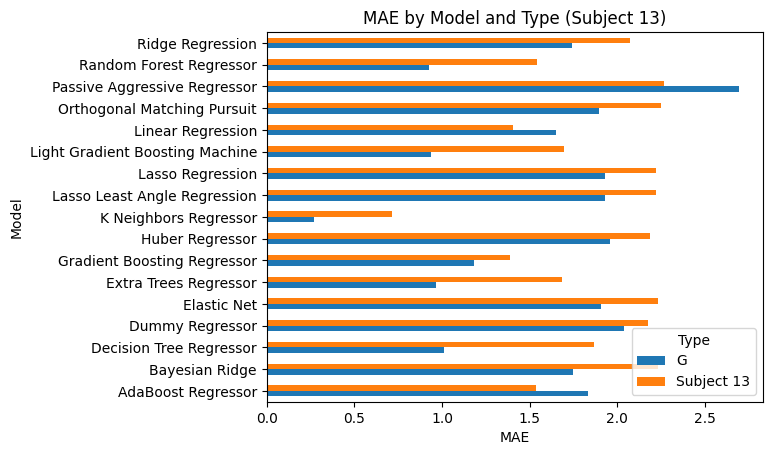

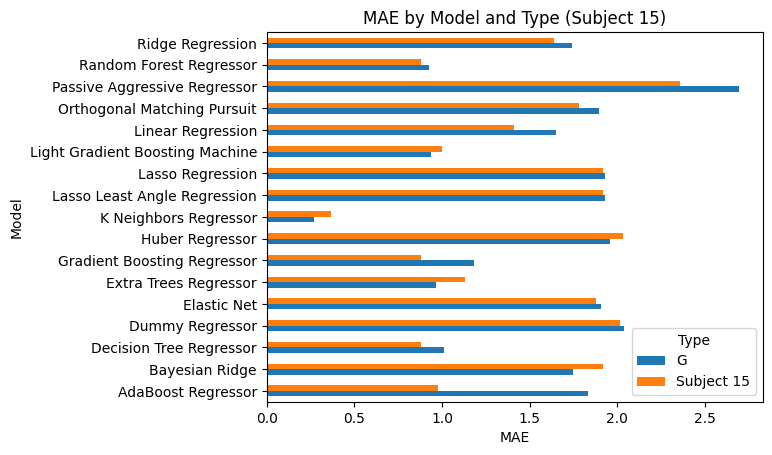

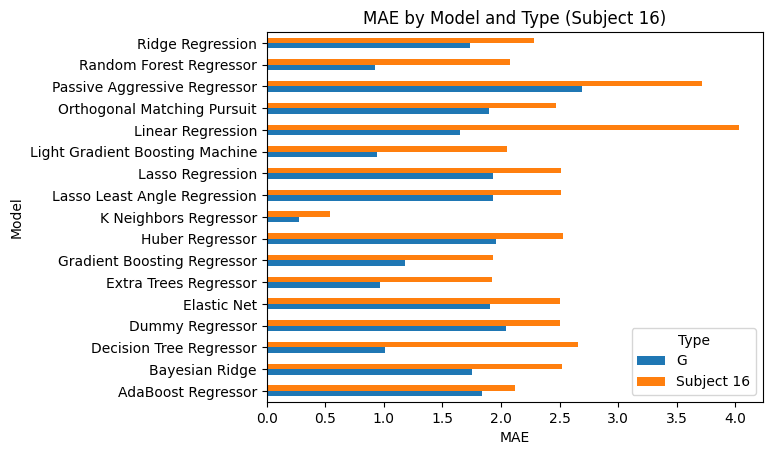

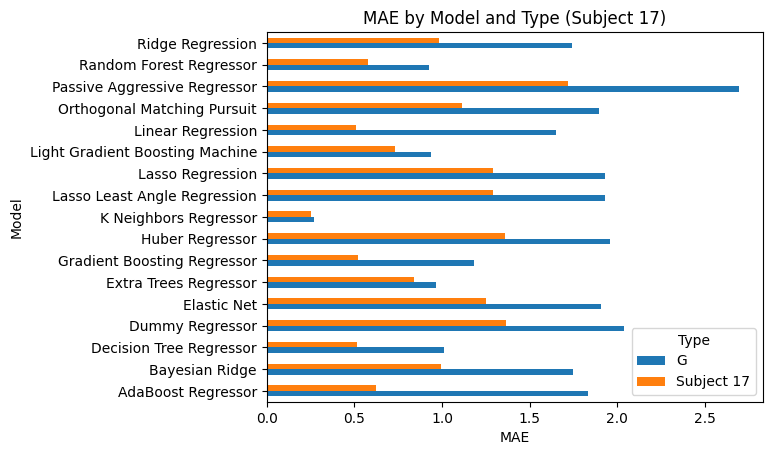

In [3]:
# Choose the measure by which to compare the models
CHOSEN_MEASURE = 'MAE'

# Creates the dataframe
df = pd.DataFrame(columns=['Model', CHOSEN_MEASURE, 'Type'])
# Iterates through all subjets
for subject in df_individual['Subject'].unique():

    # For both general and individual data:
    for df_elem in df_list:
        # Check if dataframe is for general or individual
        is_indiv = 'Subject' in df_elem.columns
        # If individual, chooses a subject. Otherwise just gets all data
        rows = df_elem[df_elem['Subject'] == subject][['Model', CHOSEN_MEASURE]] if is_indiv else df_elem[['Model', CHOSEN_MEASURE]].copy()
        # Sets type so that general and individual are distinguishable
        rows['Type'] = f'Subject {subject}' if is_indiv else 'G'
        # Adds rows to main DF
        df = df.append(rows)

for subject in df_individual['Subject'].unique():
    # I am dropping this model because its results indicate that it cannot accurately predict fatigue at all
    df_graph = df.drop(df[df['Model'] == 'Least Angle Regression'].index)

    df_graph = df_graph[df_graph['Type'].isin(['G', f'Subject {subject}'])]

    # Formats dataframe to make it easy to graph with
    df_graph = df_graph.groupby(['Model', 'Type'])[CHOSEN_MEASURE].mean().unstack()
    # Creates plot
    ax = df_graph.plot.barh()
    # Naming of graph
    ax.set_title(f'{CHOSEN_MEASURE} by Model and Type (Subject {subject})')
    ax.set_xlabel(CHOSEN_MEASURE)
    ax.set_ylabel('Model')

    # Shows graph
    plt.show()